### Model within a limited range of errors: maximum coverage

Read individual data and convert

- Geographic level: tract
- Attributes: VOTINGAGE (2) $*$ HISPANIC (2) $*$ CENRACE (63)

In [10]:
import pandas as pd
import numpy as np

filename_hist = 'data/franklin_hist.csv'
hist = pd.read_csv(filename_hist)

# block to tract
hist['TRACT'] = hist['GEOID10'].astype(str).str[:11]
col_names = hist.columns.to_numpy()
col_names = np.delete(col_names, [0, -1])
hist = hist.groupby('TRACT').sum()[col_names]
hist = hist.reset_index()
hist

,TRACT,00000000,00000001,00000002,00000003,00000004,00000005,00000006,00000007,00000008,...,07010153,07010154,07010155,07010156,07010157,07010158,07010159,07010160,07010161,07010162
0,39049000110,438,6,0,7,0,4,5,1,0,...,0,0,0,0,0,0,0,0,0,0
1,39049000120,467,4,0,11,0,2,2,0,2,...,0,0,0,0,0,0,0,0,0,0
2,39049000210,430,11,0,6,0,4,4,1,4,...,0,0,0,0,0,0,0,0,0,0
3,39049000220,653,3,1,12,0,6,7,0,6,...,0,0,0,0,0,0,0,0,0,0
4,39049000310,313,205,0,17,0,2,19,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,39049010500,1821,35,1,409,0,2,5,2,22,...,0,0,0,0,0,0,0,0,0,0
280,39049010601,1408,36,0,146,0,3,12,0,15,...,0,0,0,0,0,0,0,0,0,0
281,39049010602,1585,45,3,139,0,4,7,2,9,...,0,0,0,0,0,0,0,0,0,0
282,39049010700,83,11,0,4,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# HHGQ (8) $*$ VOTINGAGE (2) $*$ HISPANIC (2) $*$ CENRACE (63) to VOTINGAGE (2) $*$ HISPANIC (2) $*$ RACE (7)
n2, n3, n4 = 2, 2, 63

for y in range(n2):  # voting age
    y = '{number:0{width}d}'.format(width=2, number=y)
    col_names = [col for col in hist.columns if y in col[2:4] and len(col)==8]

    for z in range(n3):  # ethnicity
        z = '{number:0{width}d}'.format(width=2, number=z)
        col_names2 = [col for col in col_names if z in col[4:6]]

        col_two_or_more_races = []
        for x in range(n4):  # race
            if x >= 0 and x <= 5:
                x = '{number:0{width}d}'.format(width=2, number=x)
                col_names3 = [col for col in col_names2 if x in col[6:8]]
                hist[x + y + z] = hist[col_names3].sum(axis=1)
            else:
                x = '{number:0{width}d}'.format(width=2, number=x)
                col_names3 = [col for col in col_names2 if x in col[6:8]]
                col_two_or_more_races.extend(col_names3)
        hist['06' + y + z] = hist[col_two_or_more_races].sum(axis=1)

hist.drop([col for col in hist.columns if len(col)==8], axis=1, inplace=True)
hist

,TRACT,000000,010000,020000,030000,040000,050000,060000,000001,010001,...,040100,050100,060100,000101,010101,020101,030101,040101,050101,060101
0,39049000110,438,6,0,7,0,4,6,29,0,...,0,2,1,17,3,0,0,0,6,0
1,39049000120,467,4,0,11,0,2,6,13,0,...,1,0,3,18,0,0,0,0,4,0
2,39049000210,430,11,0,6,0,4,13,10,0,...,0,2,4,34,0,0,0,0,4,0
3,39049000220,653,3,1,12,0,6,13,20,0,...,0,6,4,16,0,2,0,0,8,1
4,39049000310,313,205,0,17,0,2,25,15,1,...,2,5,8,40,1,1,0,0,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,39049010500,1821,35,1,409,0,2,33,27,0,...,1,8,8,70,0,1,0,0,19,0
280,39049010601,1408,36,0,146,0,3,32,16,3,...,0,2,4,86,0,0,0,0,13,1
281,39049010602,1585,45,3,139,0,4,19,13,1,...,0,8,11,71,2,2,0,0,25,0
282,39049010700,83,11,0,4,0,0,2,6,1,...,1,2,2,10,0,0,0,0,14,0


In [12]:
# HISPANIC (2) $*$ RACE (7)
n3, n4 = 2, 7

hist2 = hist.copy()
for x in range(n3):  # ethnicity
    x = '{number:0{width}d}'.format(width=2, number=x)
    for y in range(n4):  # race
        y = '{number:0{width}d}'.format(width=2, number=y)
        col_names = [col for col in hist2.columns if x in col[4:6] and y in col[0:2]]
        hist2[y + x] = hist2[col_names].sum(axis=1)

hist2.drop([col for col in hist2.columns if len(col)==6], axis=1, inplace=True)
hist2    

,TRACT,0000,0100,0200,0300,0400,0500,0600,0001,0101,0201,0301,0401,0501,0601
0,39049000110,3171,37,1,36,0,6,7,46,3,1,0,0,7,1
1,39049000120,2985,44,1,42,1,2,9,31,0,2,0,0,5,0
2,39049000210,2729,52,5,32,0,6,17,44,0,0,0,0,4,0
3,39049000220,3500,32,2,55,0,12,17,36,0,2,0,0,12,6
4,39049000310,2080,737,2,70,2,7,33,55,2,1,0,0,54,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,39049010500,6402,108,3,1177,1,10,41,97,0,1,2,0,33,4
280,39049010601,3831,125,3,453,0,5,36,102,3,0,0,0,27,3
281,39049010602,5402,154,6,420,0,12,30,84,3,3,0,0,42,1
282,39049010700,1046,118,4,61,1,2,4,16,1,0,0,0,17,0


In [13]:
# RACE (7)
n4 = 7

hist3 = hist.copy()
for y in range(n4):  # race
    y = '{number:0{width}d}'.format(width=2, number=y)
    col_names = [col for col in hist3.columns if y in col[0:2]]
    hist3[y] = hist3[col_names].sum(axis=1)

hist3.drop([col for col in hist3.columns if len(col)==6], axis=1, inplace=True)
hist3    

,TRACT,00,01,02,03,04,05,06
0,39049000110,3217,40,2,36,0,13,8
1,39049000120,3016,44,3,42,1,7,9
2,39049000210,2773,52,5,32,0,10,17
3,39049000220,3536,32,4,55,0,24,23
4,39049000310,2135,739,3,70,2,61,37
...,...,...,...,...,...,...,...,...
279,39049010500,6499,108,4,1179,1,43,45
280,39049010601,3933,128,3,453,0,32,39
281,39049010602,5486,157,9,420,0,54,31
282,39049010700,1062,119,4,61,1,19,4


Model inputs

In [14]:
import numpy as np

# define all the input data for the model
I, K = hist.shape[0], hist.shape[1] - 1
nj = 10
r = 1
p = 0.1 * I * K

V = []
for k in range(1, K+1):
    V.append(hist.index[(hist.iloc[:,k] <= r) & (hist.iloc[:,k] > 0)].tolist())

count = 0
for listElem in V:
    count += len(listElem)  
print(count)

A = hist.iloc[:,1:].to_numpy()
print(A.shape, A[0])

W = np.zeros([I, I, K])
for i in range(I):
    for j in range(I):
        for k in range(K):
            if A[i, k] == 0 or A[j, k] == 0:
                W[i, j, k] = 50
            else:
                W[i, j, k] = 1 / A[i, k] + 1 / A[j, k]
print(W.shape, W[0])  

684
(284, 28) [ 438    6    0    7    0    4    6   29    0    1    0    0    1    1
 2733   31    1   29    0    2    1   17    3    0    0    0    6    0]
(284, 284, 28) [[4.56621005e-03 3.33333333e-01 5.00000000e+01 ... 5.00000000e+01
  3.33333333e-01 5.00000000e+01]
 [4.42443265e-03 4.16666667e-01 5.00000000e+01 ... 5.00000000e+01
  4.16666667e-01 5.00000000e+01]
 [4.60868642e-03 2.57575758e-01 5.00000000e+01 ... 5.00000000e+01
  4.16666667e-01 5.00000000e+01]
 ...
 [2.91401985e-03 1.88888889e-01 5.00000000e+01 ... 5.00000000e+01
  2.06666667e-01 5.00000000e+01]
 [1.43312978e-02 2.57575758e-01 5.00000000e+01 ... 5.00000000e+01
  2.38095238e-01 5.00000000e+01]
 [5.00000000e+01 5.00000000e+01 5.00000000e+01 ... 5.00000000e+01
  5.00000000e+01 5.00000000e+01]]


Coverage I: all except the origin and other uniques

In [53]:
# import numpy as np

# ## define coverage aijk
# T = np.ones((I, I, K))

# for i in range(I): 
#     for j in range(I):
#         for k in range(K):
#             if i == j or j in V[k]:
#                 T[i, j, k] = 0
# T

Coverage II: neighboring

In [54]:
import numpy as np
import geopandas as gpd
from libpysal import weights

filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)
gdf['GEOID10'] = gdf['GEOID10'].astype(str)
wr = weights.distance.KNN.from_dataframe(gdf, k=9)
print(wr.neighbors[0])

## define coverage aijk
T = np.zeros((I, I, K))
for i in wr.neighbors:
    neighbors_idx = wr.neighbors[i]
    for j in neighbors_idx:
        geoid = gdf.loc[[j],'GEOID10'].values[0]
        idx = hist.loc[hist["TRACT"] == geoid].index[0]
        for k in range(K):
            if j not in V[k]:
                T[i, j, k] = 1
T        

[4, 90, 89, 276, 12, 123, 171, 1, 180]


array([[[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Run model

In [55]:
import pandas as pd
from gurobipy import Model, GRB, LinExpr, quicksum

# initialize model
m = Model('td')
# m.Params.LogToConsole = 0

# add objective function
obj = LinExpr()

# add decision variables and objective function
theta = {}     ## decision vairable
for k in range(K):
    if len(V[k]) == 0:
        continue
    for i in V[k]:
        # objective
        for j in range(I):
            theta[i, j, k] = m.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=1, name="theta_%d_%d_%d"%(i, j, k))
            obj += T[i, j, k] * theta[i, j, k] * A[i, k]
        # add constraints
        m.addConstr(quicksum(theta[i, j, k] for j in range(I)) == 1)
        m.addConstr(theta[i, i, k] + quicksum(T[i, j, k] * theta[i, j, k] for j in range(I)) == 1)

for j in range(I):
    m.addConstr(quicksum(quicksum(theta[i, j, k] * T[i, j, k] * A[i, k] for i in V[k]) for k in range(K)) <= nj)

m.addConstr(quicksum(quicksum(quicksum(W[i, j, k] * T[i, j, k] * theta[i, j, k] * A[i, k] for i in V[k]) for k in range(K)) for j in range(I)) <= p)

m.setObjective(obj, GRB.MAXIMIZE)

m.update()
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1653 rows, 194256 columns and 210252 nonzeros
Model fingerprint: 0xf4dbccc9
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+02]

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 718 rows and 189178 columns
Presolve time: 0.12s
Presolved: 935 rows, 5078 columns, 15015 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.793e+03
 Factor NZ  : 2.539e+04 (roughly 3 MB of memory)
 Factor Ops : 8.516e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   7.88051626e+04  1.57987267e+03  6.70e+04 6.05e-01  1.15e+01     0s

Bar

In [56]:
# for var in m.getVars():
#     print(var.VarName, var.X)

with open('data/theta/MCM_SP_franklin.csv', 'w') as f:
    for var in m.getVars():
        f.write(str(var.VarName) + ',' + str(var.X) + '\n')

Error: FA

C:\Users\Yue\AppData\Local\Temp\ipykernel_22436\4148374254.py:46: RuntimeWarning: invalid value encountered in double_scalars
  theta2_fa[i, j, k2] = sum1 / sum2


0
0


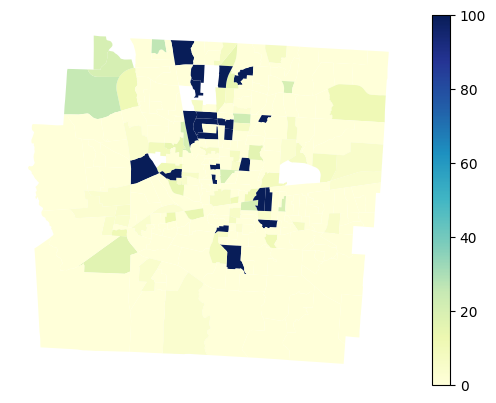

In [ ]:
## SP
import csv
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics

filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged_fa = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged_fa["0101_before"] = merged_fa["0200"]
merged_fa = merged_fa.sort_index()

with open('data/theta/MCM_FA_franklin.csv', newline='') as f:
    reader = csv.reader(f)
    data_fa = list(reader)

theta_fa = np.zeros([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_fa[i, i, k] = 1
for var in data_fa:
    name = var[0].split("_")
    theta_fa[int(name[1]), int(name[2]), int(name[3])] = var[1]

K2 = hist2.shape[1] - 1
Q2 = np.zeros([K2, K])
for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0
theta2_fa = np.zeros([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_fa[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_fa[i, j, k2] = sum1 / sum2           
theta2_fa[~np.isfinite(theta2_fa)] = 0

A2 = hist2.iloc[:,1:].to_numpy()
A2_fa = np.zeros([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in range(I):
            sum += theta2_fa[i, j, k2] * A2[i, k2]
        A2_fa[j, k2] = sum

A2_fa = pd.DataFrame(A2_fa)
A2_fa["TRACT"] = hist2["TRACT"]
merged_fa = merged_fa.join(A2_fa.set_index('TRACT'))
merged_fa["0101_after"] = merged_fa[2]
merged_fa['0101_after'] = merged_fa['0101_after'].fillna(0)
merged_fa = merged_fa.sort_index()
merged_fa["diff"] = abs(merged_fa["0101_after"] - merged_fa["0101_before"]) / (merged_fa["0101_after"] + merged_fa["0101_before"]) * 100
print(len(merged_fa[(merged_fa['0101_after']==1) & (merged_fa['0101_before']==1)]))
print(len(merged_fa[merged_fa['0101_after']==1]))

fig = merged_fa.plot(column='diff', legend=True, cmap='YlGnBu', vmin=0, vmax=100)
fig.set_axis_off()
fig.get_figure().savefig('plot/error_mcm_fa_franklin.eps')

Error: SP

C:\Users\Yue\AppData\Local\Temp\ipykernel_3108\2863449880.py:47: RuntimeWarning: invalid value encountered in double_scalars
  theta2_sp[i, j, k2] = sum1 / sum2


0
0


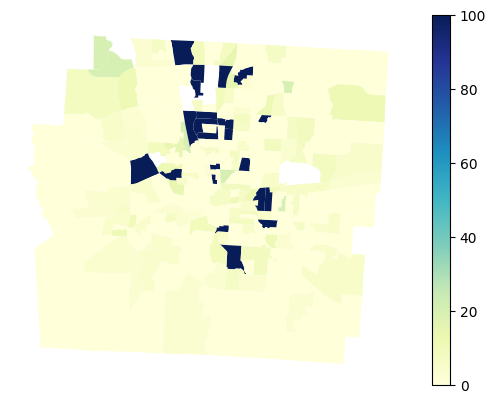

In [ ]:
## SP
import csv
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics

filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged_sp = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged_sp["0101_before"] = merged_sp["0200"]
merged_sp = merged_sp.sort_index()


with open('data/theta/MCM_SP_franklin.csv', newline='') as f:
    reader = csv.reader(f)
    data_sp = list(reader)

theta_sp = np.zeros([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_sp[i, i, k] = 1
for var in data_sp:
    name = var[0].split("_")
    theta_sp[int(name[1]), int(name[2]), int(name[3])] = var[1]

K2 = hist2.shape[1] - 1
Q2 = np.zeros([K2, K])
for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0
theta2_sp = np.zeros([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_sp[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_sp[i, j, k2] = sum1 / sum2           
theta2_sp[~np.isfinite(theta2_sp)] = 0

A2 = hist2.iloc[:,1:].to_numpy()
A2_sp = np.zeros([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in range(I):
            sum += theta2_sp[i, j, k2] * A2[i, k2]
        A2_sp[j, k2] = sum

A2_sp = pd.DataFrame(A2_sp)
A2_sp["TRACT"] = hist2["TRACT"]
merged_sp = merged_sp.join(A2_sp.set_index('TRACT'))
merged_sp["0101_after"] = merged_sp[2]
merged_sp['0101_after'] = merged_sp['0101_after'].fillna(0)
merged_sp = merged_sp.sort_index()
merged_sp["diff"] = abs(merged_sp["0101_after"] - merged_sp["0101_before"]) / (merged_sp["0101_after"] + merged_sp["0101_before"]) * 100
print(len(merged_sp[(merged_sp['0101_after']==1) & (merged_sp['0101_before']==1)]))
print(len(merged_sp[merged_sp['0101_after']==1]))

fig = merged_sp.plot(column='diff', legend=True, cmap='YlGnBu', vmin=0, vmax=100)
fig.set_axis_off()
fig.get_figure().savefig('plot/error_mcm_sp_franklin.eps')

LISA: FA

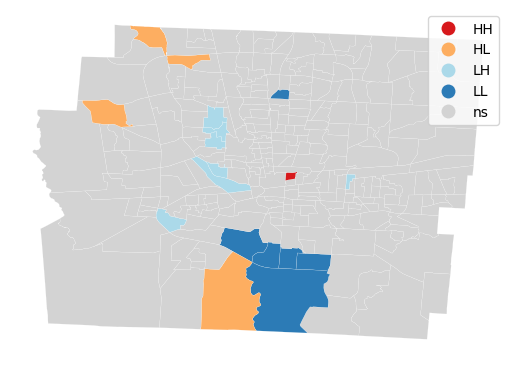

In [24]:
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics
from splot.esda import lisa_cluster

np.random.seed(0)
filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged_fa = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged_fa["0101_pct_before"] = merged_fa["0200"]/(merged_fa["0000"]+merged_fa["0100"]+merged_fa["0200"]+merged_fa["0300"]+merged_fa["0400"]+merged_fa["0500"]+merged_fa["0600"]+merged_fa["0001"]+merged_fa["0101"]+merged_fa["0201"]+merged_fa["0301"]+merged_fa["0401"]+merged_fa["0501"]+merged_fa["0601"]) * 100
merged_fa = merged_fa.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=20)
w.transform = 'R'
lisa = esda.moran.Moran_Local(merged_fa["0101_pct_before"], w)
fig = lisa_cluster(lisa, gdf)

C:\Users\Yue\AppData\Local\Temp\ipykernel_244\799672061.py:37: RuntimeWarning: invalid value encountered in double_scalars
  theta2_fa[i, j, k2] = sum1 / sum2
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


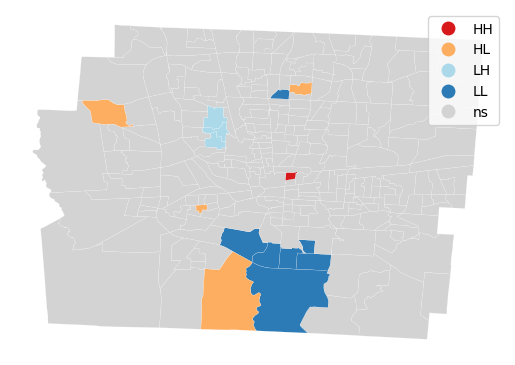

In [25]:
## FA
import csv
import numpy as np
import geopandas as gpd

with open('data/theta/MCM_FA_franklin.csv', newline='') as f:
    reader = csv.reader(f)
    data_fa = list(reader)

theta_fa = np.zeros([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_fa[i, i, k] = 1
for var in data_fa:
    name = var[0].split("_")
    theta_fa[int(name[1]), int(name[2]), int(name[3])] = var[1]

K2 = hist2.shape[1] - 1
Q2 = np.zeros([K2, K])
for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0
theta2_fa = np.zeros([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_fa[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_fa[i, j, k2] = sum1 / sum2           
theta2_fa[~np.isfinite(theta2_fa)] = 0

A2 = hist2.iloc[:,1:].to_numpy()
A2_fa = np.zeros([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in range(I):
            sum += theta2_fa[i, j, k2] * A2[i, k2]
        A2_fa[j, k2] = sum

A2_fa = pd.DataFrame(A2_fa)
A2_fa["TRACT"] = hist2["TRACT"]
merged_fa = merged_fa.join(A2_fa.set_index('TRACT'))
merged_fa["0101_pct_after"] = merged_fa[2]/(merged_fa[0]+merged_fa[1]+merged_fa[2]+merged_fa[3]+merged_fa[4]+merged_fa[5]+merged_fa[6]+merged_fa[7]+merged_fa[8]+merged_fa[9]+merged_fa[10]+merged_fa[11]+merged_fa[12]+merged_fa[13]) * 100
merged_fa['0101_pct_after'] = merged_fa['0101_pct_after'].fillna(0)
merged_fa = merged_fa.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=20)
w.transform = 'R'
lisa_fa = esda.moran.Moran_Local(merged_fa["0101_pct_after"], w)
fig = lisa_cluster(lisa_fa, gdf)
plt.savefig('plot/lisa_mcm_fa_guernsey.eps', format='eps')

LISA: SP

In [26]:
import numpy as np
import geopandas as gpd
from libpysal import weights
import esda
import matplotlib.pyplot as plt  # Graphics

filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged_sp = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged_sp["0101_pct_before"] = merged_sp["0200"]/(merged_sp["0000"]+merged_sp["0100"]+merged_sp["0200"]+merged_sp["0300"]+merged_sp["0400"]+merged_sp["0500"]+merged_sp["0600"]+merged_sp["0001"]+merged_sp["0101"]+merged_sp["0201"]+merged_sp["0301"]+merged_sp["0401"]+merged_sp["0501"]+merged_sp["0601"]) * 100
merged_sp = merged_sp.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=20)
w.transform = 'R'
lisa = esda.moran.Moran_Local(merged_sp["0101_pct_before"], w)

C:\Users\Yue\AppData\Local\Temp\ipykernel_244\694703211.py:37: RuntimeWarning: invalid value encountered in double_scalars
  theta2_sp[i, j, k2] = sum1 / sum2
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


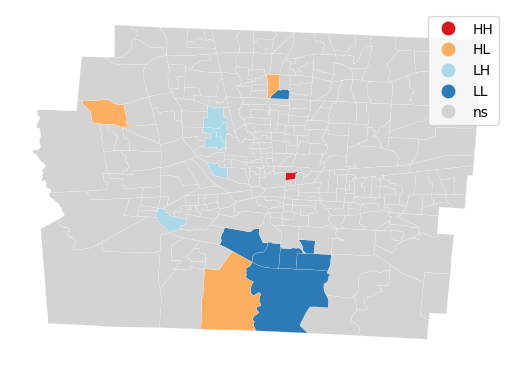

In [27]:
## SP
import csv
import numpy as np
import geopandas as gpd

with open('data/theta/MCM_SP_franklin.csv', newline='') as f:
    reader = csv.reader(f)
    data_sp = list(reader)

theta_sp = np.zeros([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_sp[i, i, k] = 1
for var in data_sp:
    name = var[0].split("_")
    theta_sp[int(name[1]), int(name[2]), int(name[3])] = var[1]

K2 = hist2.shape[1] - 1
Q2 = np.zeros([K2, K])
for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0
theta2_sp = np.zeros([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_sp[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_sp[i, j, k2] = sum1 / sum2           
theta2_sp[~np.isfinite(theta2_sp)] = 0

A2 = hist2.iloc[:,1:].to_numpy()
A2_sp = np.zeros([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in range(I):
            sum += theta2_sp[i, j, k2] * A2[i, k2]
        A2_sp[j, k2] = sum

A2_sp = pd.DataFrame(A2_sp)
A2_sp["TRACT"] = hist2["TRACT"]
merged_sp = merged_sp.join(A2_sp.set_index('TRACT'))
merged_sp["0101_pct_after"] = merged_sp[2]/(merged_sp[0]+merged_sp[1]+merged_sp[2]+merged_sp[3]+merged_sp[4]+merged_sp[5]+merged_sp[6]+merged_sp[7]+merged_sp[8]+merged_sp[9]+merged_sp[10]+merged_sp[11]+merged_sp[12]+merged_sp[13]) * 100
merged_sp['0101_pct_after'] = merged_sp['0101_pct_after'].fillna(0)
merged_sp = merged_sp.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=20)
w.transform = 'R'
lisa_sp = esda.moran.Moran_Local(merged_sp["0101_pct_after"], w)
fig = lisa_cluster(lisa_sp, gdf)
plt.savefig('plot/lisa_mcm_sp_franklin.eps', format='eps')